# **Analysing Naming Trends**

In [1]:
from io import BytesIO  # Import BytesIO
import pandas as pd
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset Information:**

- Popular baby names data provided by the Social Security Administration (SSA)
of the United States.
- The dataset is in zipped format. We have to extract the dataset in the program,
visualize the number of male and female babies born in a particular year, and
find out popular baby names.mes.

In [2]:
years = range(1880,2019)
pieces = []
columns = ['name','sex','count']
for year in years:
    with ZipFile('names.zip', 'r') as z:
        names = z.namelist()[0]  # Get the first file name in the ZIP
        df = pd.read_csv(BytesIO(z.read('yob%d.txt' %year)), encoding='utf-8', engine='python', header=None,names = columns)
    
        df['year'] = year
        pieces.append(df)

df = pd.concat(pieces, ignore_index = True)
df


,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1958085,Zylas,M,5,2018
1958086,Zyran,M,5,2018
1958087,Zyrie,M,5,2018
1958088,Zyron,M,5,2018


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958090 entries, 0 to 1958089
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   count   int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 59.8+ MB


In [4]:
total_births = df.pivot_table('count',index = 'year',columns = 'sex', aggfunc = sum)
total_births

C:\Users\Dell\AppData\Local\Temp\ipykernel_10156\1724296113.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = df.pivot_table('count',index = 'year',columns = 'sex', aggfunc = sum)


sex,F,M
year,,
1880,90994,110490
1881,91953,100735
1882,107847,113686
1883,112320,104625
1884,129019,114442
...,...,...
2014,1785491,1919925
2015,1784114,1915735
2016,1770926,1896596


### **visualize the number of male and female babies born in a particularyear**

<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

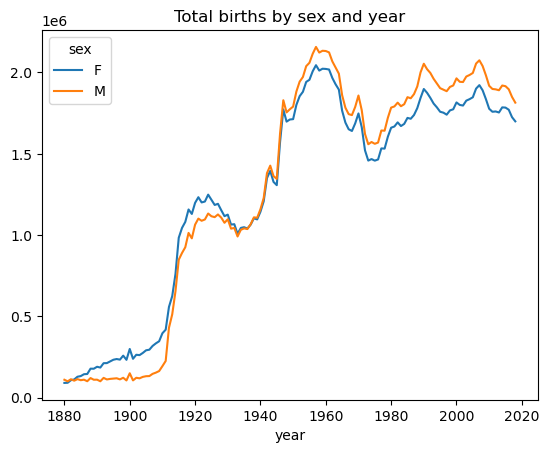

In [5]:
total_births.plot(title = 'Total births by sex and year')


### **Analysze baby names by sorting out all birth counts**
analyze baby names by sorting out top 100 birth counts and group
them by names to find out popular baby namesss

In [6]:
def get_top100(group):
    return group.sort_values(by = 'count',ascending = False)[:100]
grouped = df.groupby(['year','sex'])
top100 = grouped.apply(get_top100)
top100.reset_index(inplace = True, drop = True)
print(top100)

            name sex  count  year
0           Mary   F   7065  1880
1           Anna   F   2604  1880
2           Emma   F   2003  1880
3      Elizabeth   F   1939  1880
4         Minnie   F   1746  1880
...          ...  ..    ...   ...
27795     Parker   M   4005  2018
27796     Kayden   M   3999  2018
27797      Miles   M   3989  2018
27798     Sawyer   M   3878  2018
27799      Jason   M   3873  2018

[27800 rows x 4 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10156\1168560011.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top100 = grouped.apply(get_top100)


In [7]:
total_births = top100.pivot_table('count',index = 'year', columns = 'name', aggfunc = sum)
total_births

C:\Users\Dell\AppData\Local\Temp\ipykernel_10156\3288889380.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top100.pivot_table('count',index = 'year', columns = 'name', aggfunc = sum)


name,Aaliyah,Aaron,Abigail,Ada,Adam,Addie,Addison,Adeline,Adrian,Agnes,...,Willow,Wilma,Woodrow,Wyatt,Xavier,Yolanda,Yvonne,Zachary,Zoe,Zoey
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,652.0,NaN,274.0,NaN,NaN,NaN,473.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,628.0,NaN,287.0,NaN,NaN,NaN,424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,689.0,NaN,341.0,NaN,NaN,NaN,565.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,778.0,NaN,362.0,NaN,NaN,NaN,623.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,854.0,NaN,356.0,NaN,NaN,NaN,703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,4897.0,7409.0,12109.0,NaN,5338.0,NaN,7005.0,NaN,6704.0,NaN,...,NaN,NaN,NaN,8893.0,4783.0,NaN,NaN,5186.0,5883.0,7439.0
2015,4878.0,7173.0,12420.0,NaN,5401.0,NaN,6732.0,NaN,6535.0,NaN,...,NaN,NaN,NaN,9655.0,4659.0,NaN,NaN,4865.0,6051.0,6967.0
2016,4655.0,7172.0,11794.0,NaN,5219.0,NaN,6334.0,4118.0,6334.0,NaN,...,3124.0,NaN,NaN,9577.0,4619.0,NaN,NaN,4575.0,5761.0,6477.0


In [8]:
a = []
for i in top100.name[:10]:
    a.append(i)
a

['Mary',
 'Anna',
 'Emma',
 'Elizabeth',
 'Minnie',
 'Margaret',
 'Ida',
 'Alice',
 'Bertha',
 'Sarah']

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

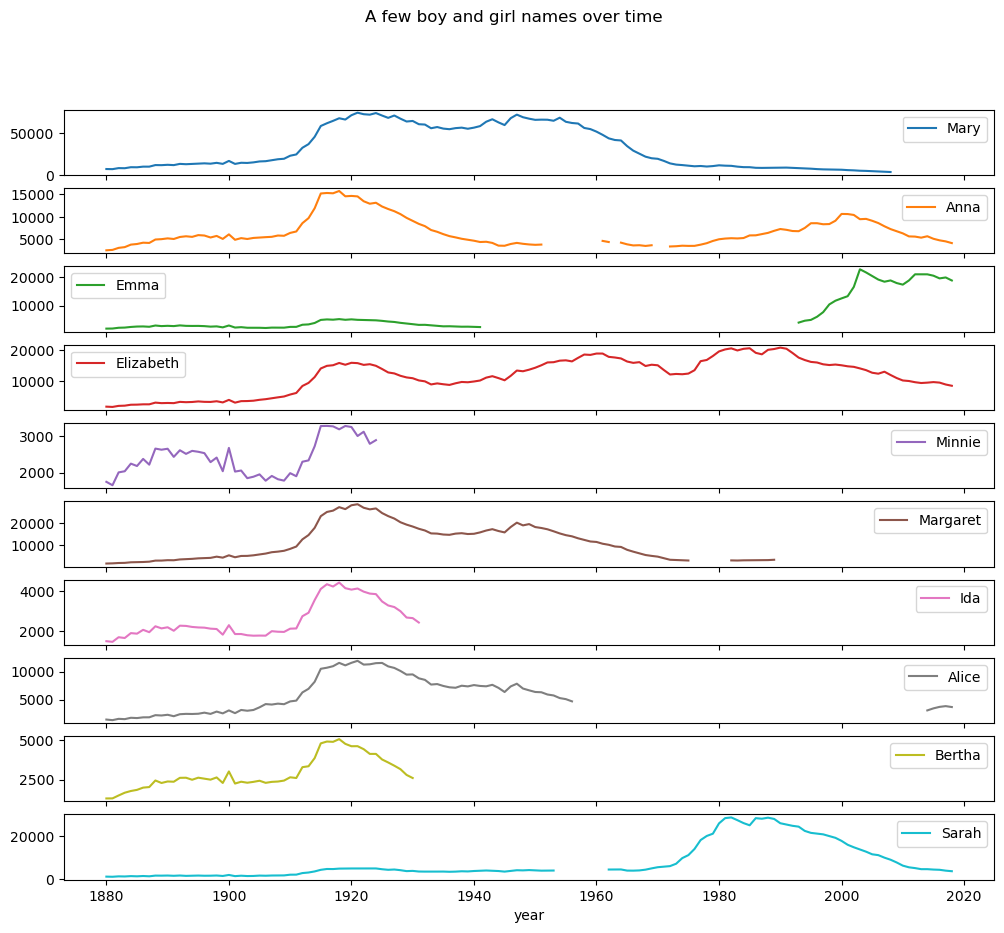

In [9]:
subset = total_births[a]
subset.plot(subplots = True, figsize = (12,10), grid = False, 
            title = 'A few boy and girl names over time')